In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("new_train.csv")
df1=pd.read_csv("new_test.csv")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [4]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [5]:
df.drop(["pdays","previous"],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  poutcome     32950 non-null  object
 13  y            32950 non-null  object
dtypes: int64(3), object(11)
memory usage: 3.5+ MB


<AxesSubplot:xlabel='y', ylabel='count'>

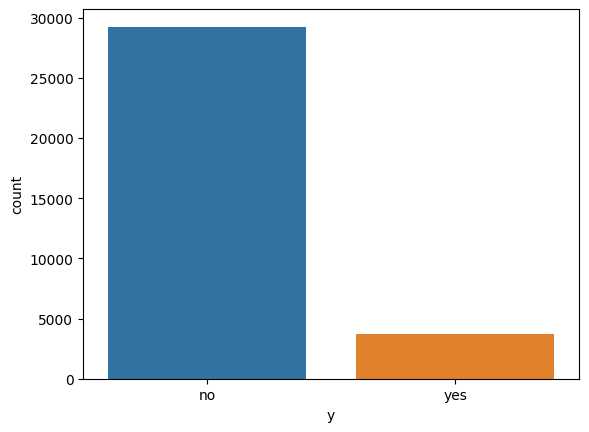

In [7]:
sns.countplot(df.y)

# Target is imabalance

<AxesSubplot:xlabel='job', ylabel='count'>

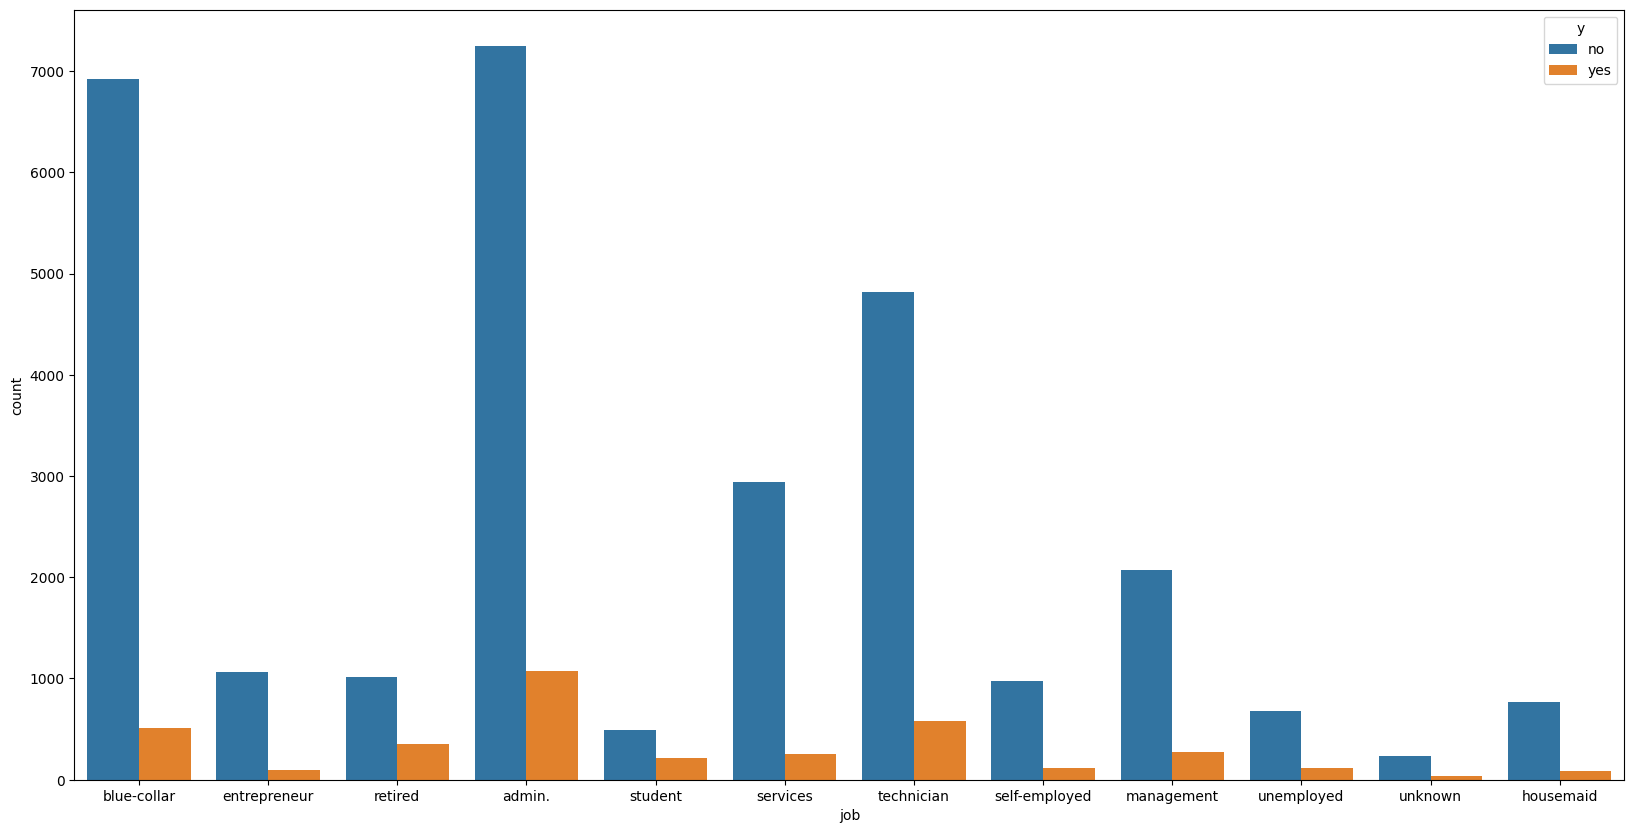

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(df.job,hue=df["y"]) #y is term deposit

# people working as admin invested more in term deposit 

<AxesSubplot:xlabel='education', ylabel='count'>

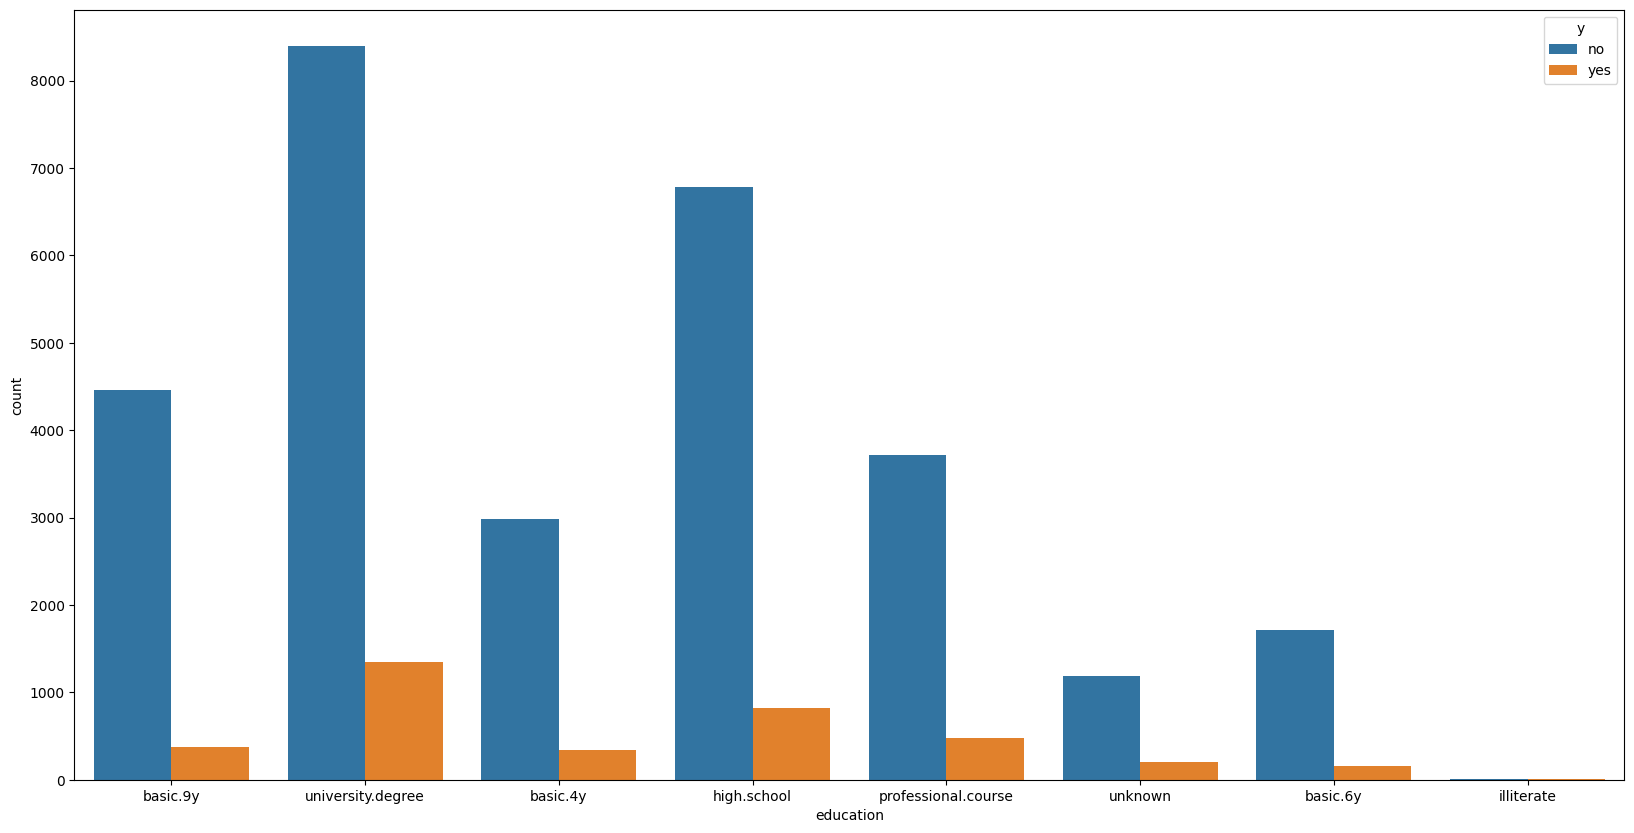

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(df.education,hue=df["y"]) 

# people who completed degree has highly chance that they will subscribe term deposit

<AxesSubplot:xlabel='marital', ylabel='count'>

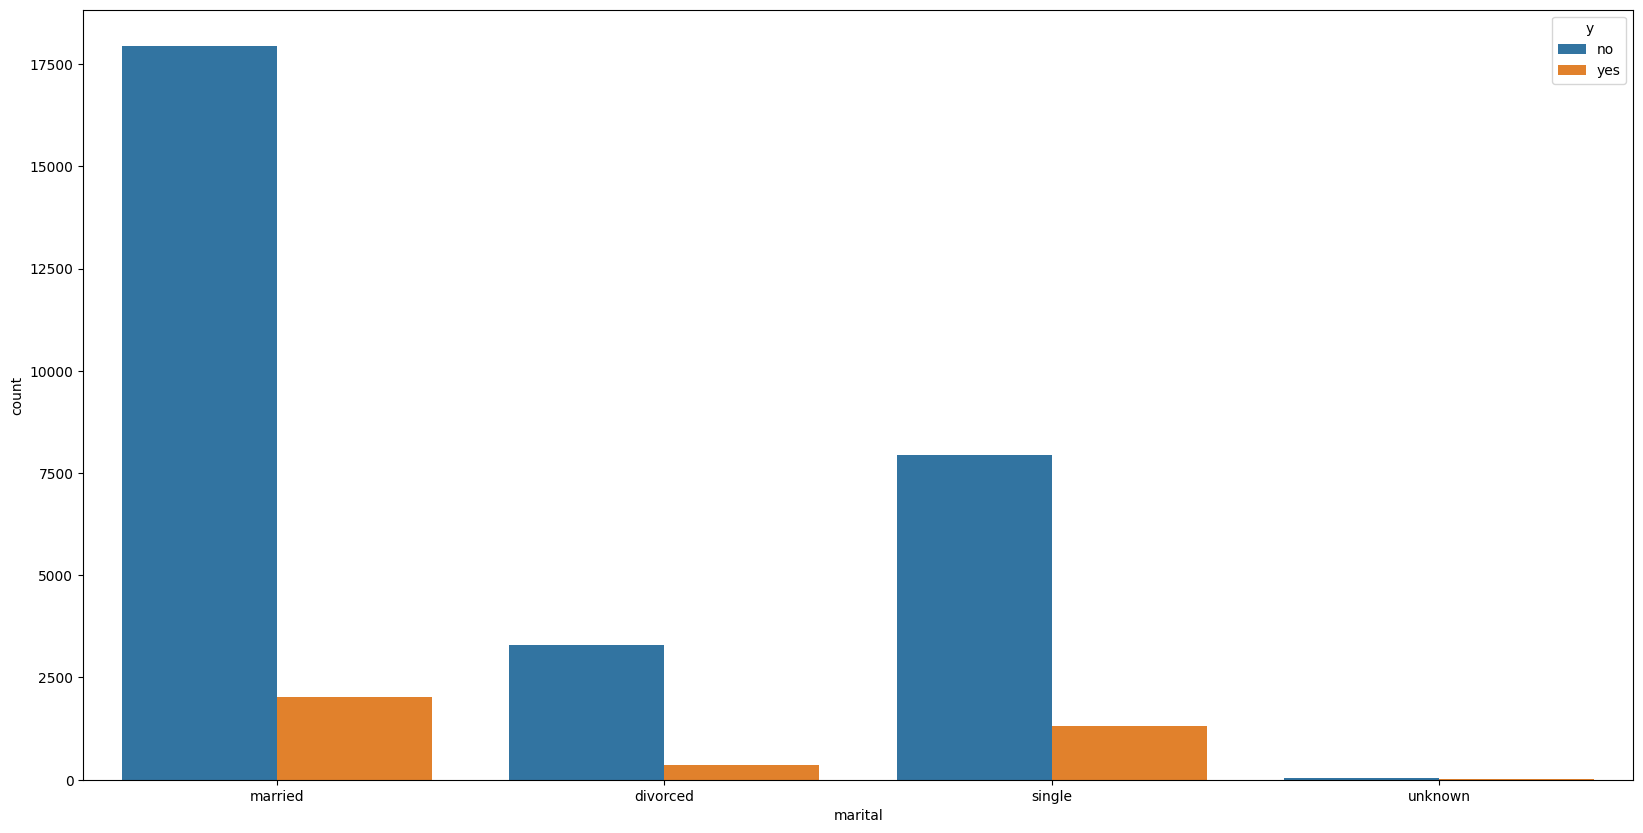

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(df.marital,hue=df["y"]) 

# Divorced people has less chance of subscribing for term deposit

<AxesSubplot:xlabel='month', ylabel='count'>

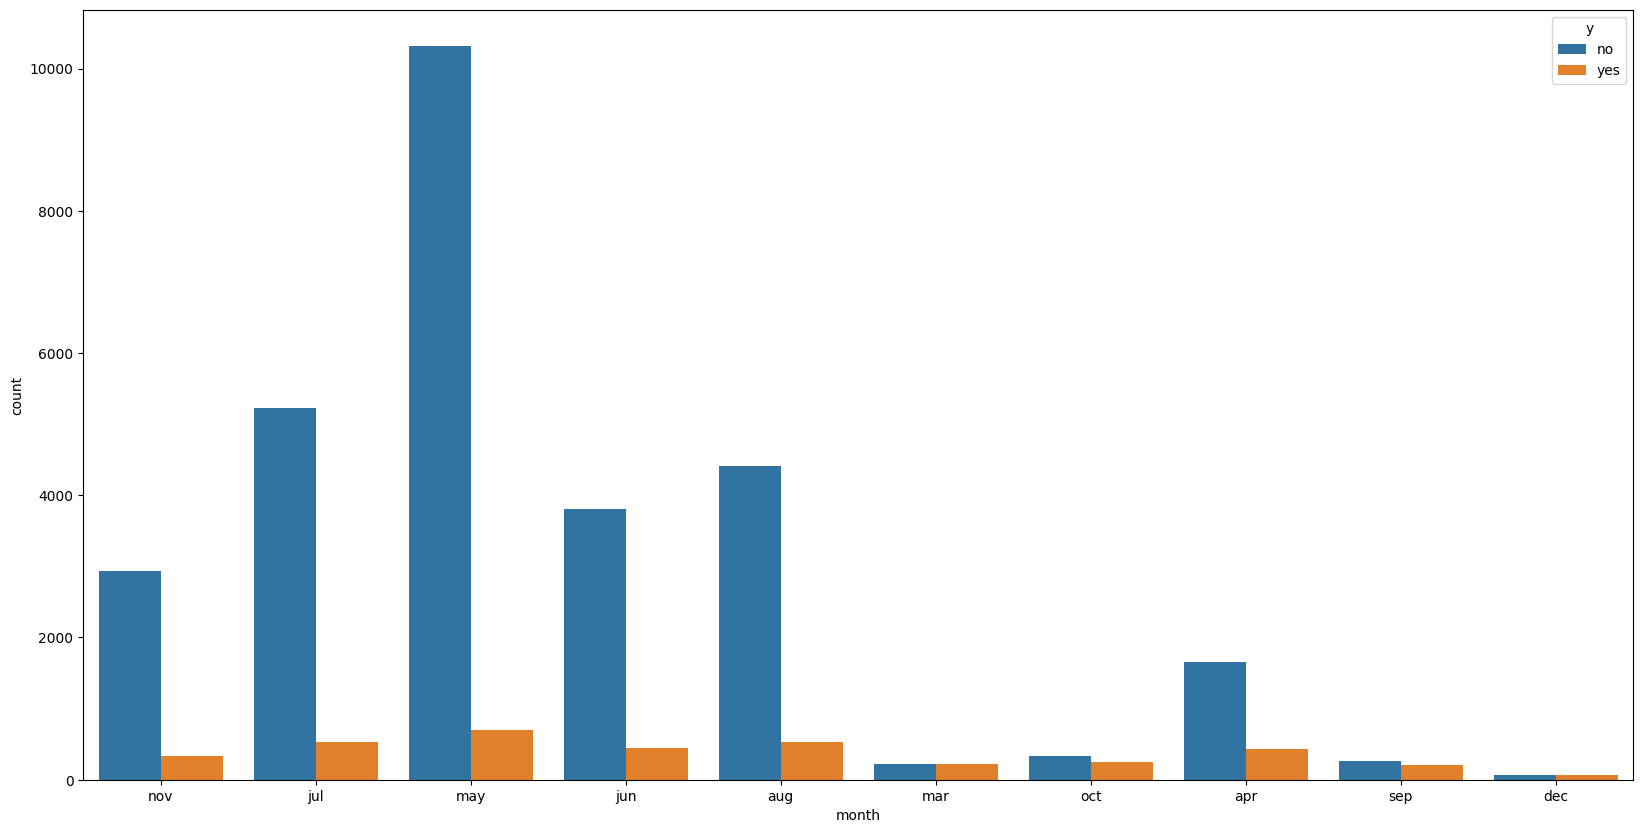

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(df.month,hue=df["y"]) 

# In month of may subscription is more and in december subscription is less for term deposit

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

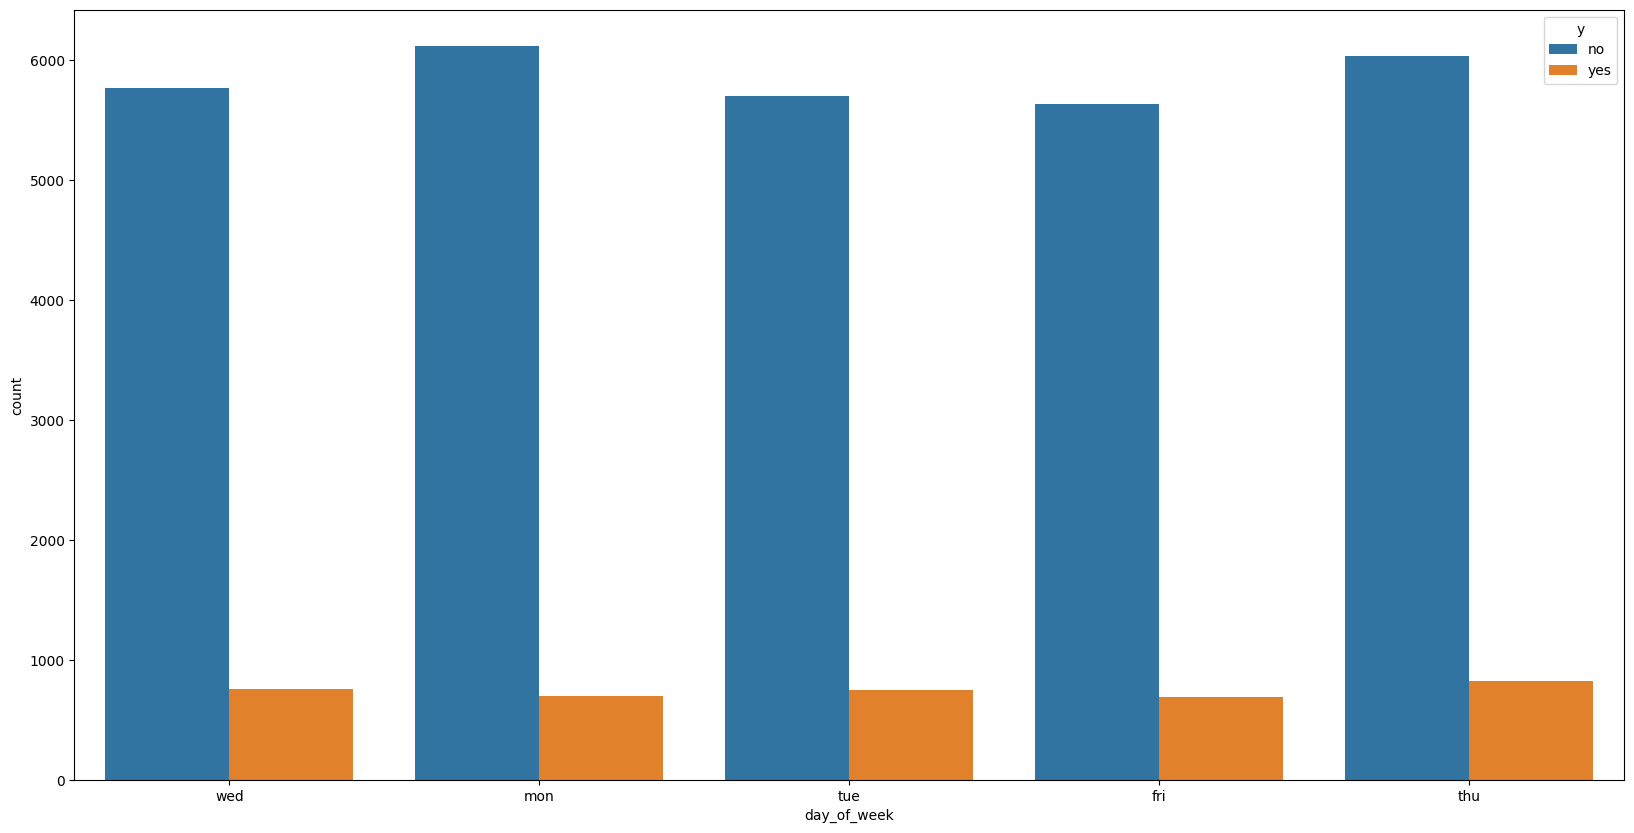

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(df.day_of_week,hue=df["y"]) 

# each day has almost similar subscription for term deposit their is no particular day where subscription is very less or more 


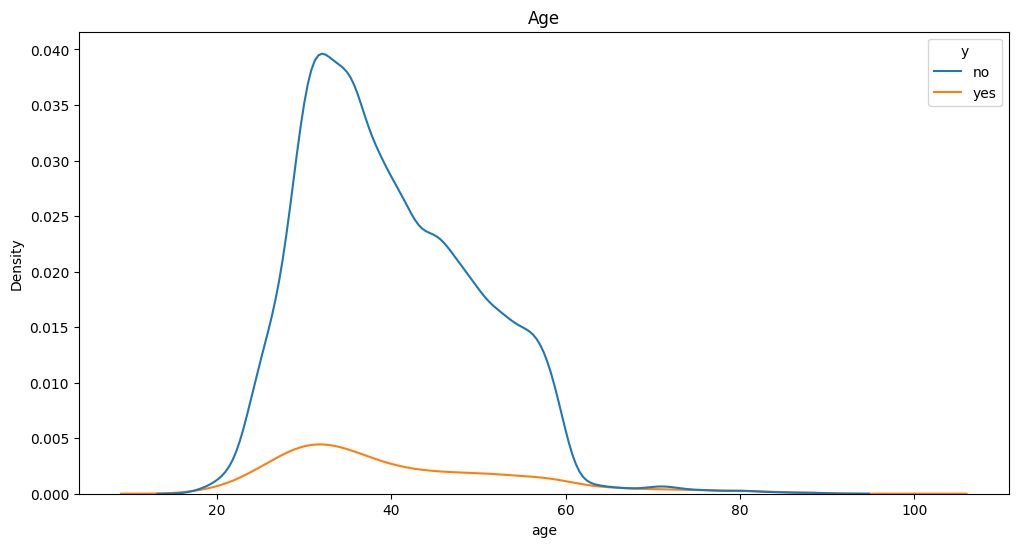

In [13]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df, x ="age",hue=df["y"])
plt.xlabel("age")
plt.title("Age")
plt.show()

# people from age 20 to 40 subscribed more for term deposits

<AxesSubplot:xlabel='default', ylabel='count'>

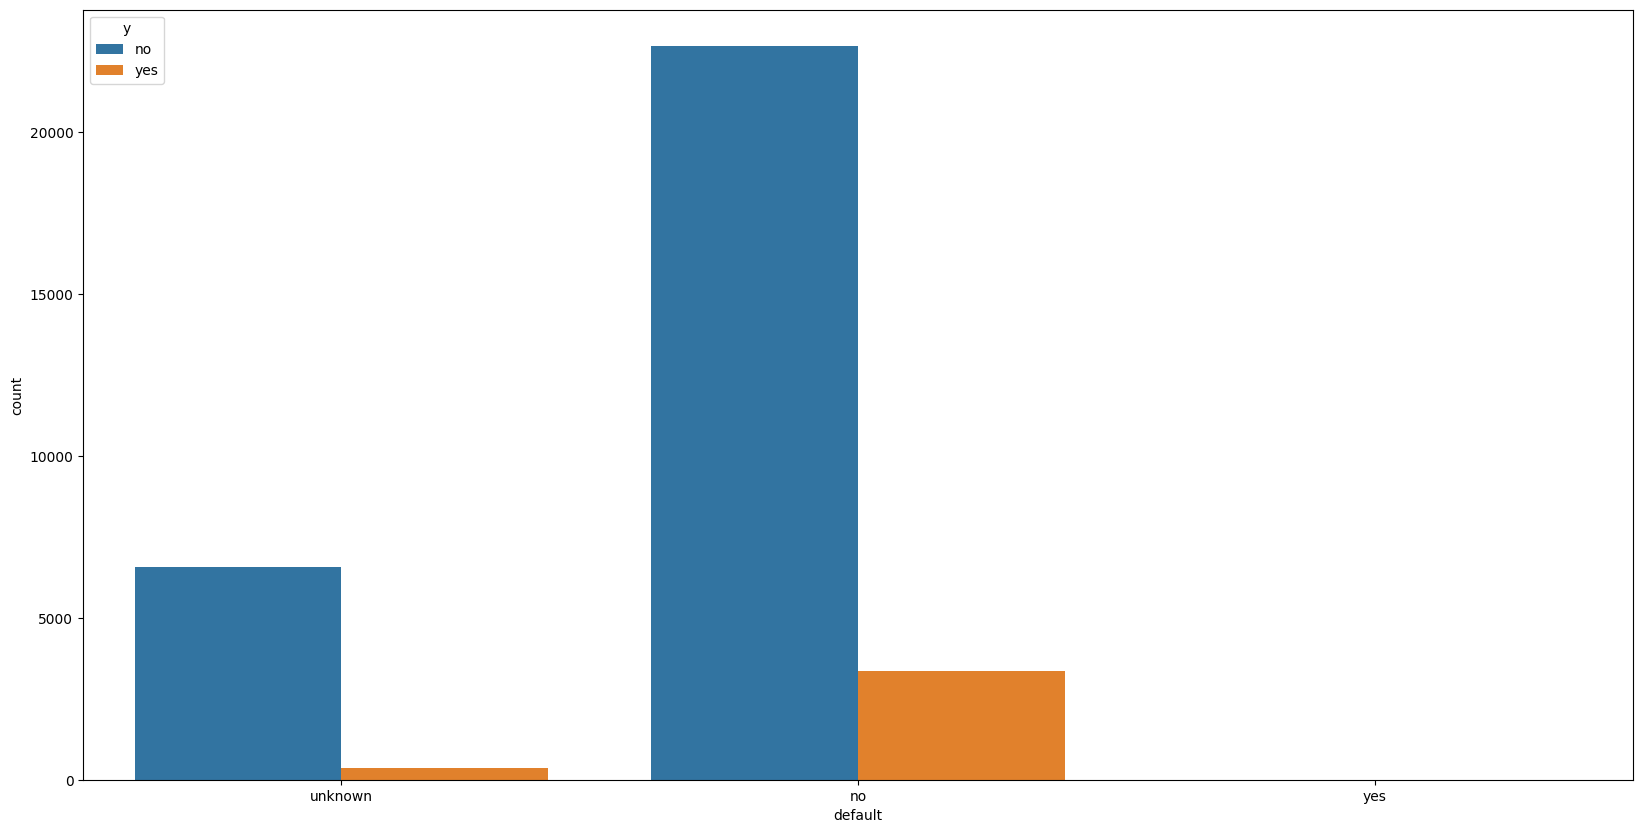

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(df.default,hue=df["y"])

# people with no default subscribed more for term deposit 

In [15]:
co_cols=df.select_dtypes(include='O').columns
co_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder 


In [17]:
le=LabelEncoder()

In [18]:
for i in co_cols:
    df[i]=le.fit_transform(df[i])

In [19]:
x=df.drop("y",axis=1)

In [20]:
y=df["y"]

In [21]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='auto')
X,y=sm.fit_resample(x,y)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [24]:
X_train.shape

(46780, 13)

In [25]:
X_test.shape

(11696, 13)

In [26]:
y_train.shape

(46780,)

In [27]:
y_test.shape

(11696,)

In [28]:
sc=StandardScaler()

In [29]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [31]:
lr=LogisticRegression()
kn=KNeighborsClassifier(n_neighbors=9)
xg=XGBClassifier()
svm=SVC()

In [32]:
from sklearn.metrics import classification_report
def my_model(model):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    print("train data")
    print(classification_report(y_train,y_pred_train))
    print("test data")
    print(classification_report(y_test,y_pred_test))
    return model 

In [33]:
my_model(lr)

train data
              precision    recall  f1-score   support

           0       0.83      0.80      0.81     23311
           1       0.81      0.84      0.82     23469

    accuracy                           0.82     46780
   macro avg       0.82      0.82      0.82     46780
weighted avg       0.82      0.82      0.82     46780

test data
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      5927
           1       0.80      0.84      0.82      5769

    accuracy                           0.82     11696
   macro avg       0.82      0.82      0.82     11696
weighted avg       0.82      0.82      0.82     11696



LogisticRegression()

In [34]:
my_model(kn)

train data
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     23311
           1       0.88      0.92      0.90     23469

    accuracy                           0.90     46780
   macro avg       0.90      0.90      0.90     46780
weighted avg       0.90      0.90      0.90     46780

test data
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      5927
           1       0.86      0.90      0.88      5769

    accuracy                           0.88     11696
   macro avg       0.88      0.88      0.88     11696
weighted avg       0.88      0.88      0.88     11696



KNeighborsClassifier(n_neighbors=9)

In [35]:
my_model(svm)

train data
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     23311
           1       0.86      0.90      0.88     23469

    accuracy                           0.88     46780
   macro avg       0.88      0.88      0.88     46780
weighted avg       0.88      0.88      0.88     46780

test data
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      5927
           1       0.85      0.90      0.87      5769

    accuracy                           0.87     11696
   macro avg       0.87      0.87      0.87     11696
weighted avg       0.87      0.87      0.87     11696



SVC()

In [36]:
my_model(xg)

train data
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     23311
           1       0.94      0.95      0.94     23469

    accuracy                           0.94     46780
   macro avg       0.94      0.94      0.94     46780
weighted avg       0.94      0.94      0.94     46780

test data
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5927
           1       0.90      0.92      0.91      5769

    accuracy                           0.91     11696
   macro avg       0.91      0.91      0.91     11696
weighted avg       0.91      0.91      0.91     11696



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [37]:
data={"models":["LogisticRegression","KNeighborsClassifier","XGBClassifier","support vector machine classifier"],
     "Train_accuracy":[82,90,94,88],
      "Test_accuracy":[82,88,91,88]
     }
models=pd.DataFrame(data)

In [38]:
models

,models,Train_accuracy,Test_accuracy
0,LogisticRegression,82,82
1,KNeighborsClassifier,90,88
2,XGBClassifier,94,91
3,support vector machine classifier,88,88


<AxesSubplot:xlabel='Train_accuracy', ylabel='models'>

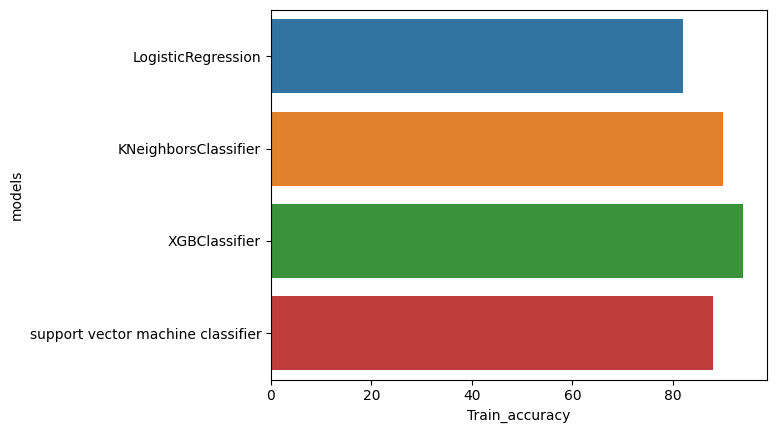

In [39]:
sns.barplot(x="Train_accuracy",y="models",data=models)

<AxesSubplot:xlabel='Test_accuracy', ylabel='models'>

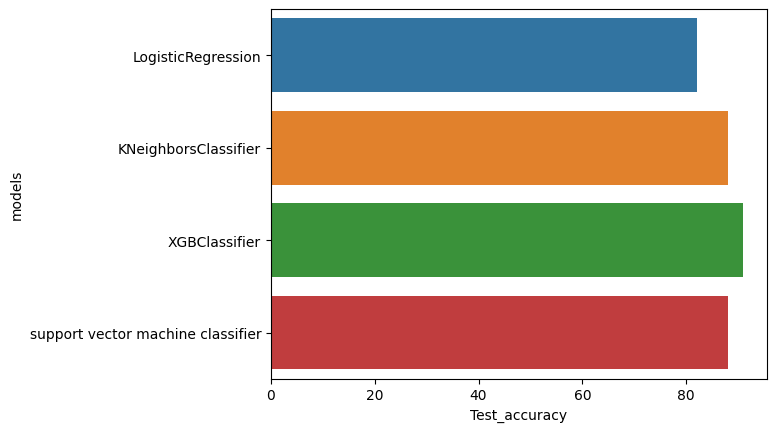

In [40]:
sns.barplot(x="Test_accuracy",y="models",data=models)